In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load datasets
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')


In [5]:
# Aggregate transaction data for each customer
transactions_summary = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',  # Total quantity purchased
    'TotalValue': 'sum' # Total transaction value
}).reset_index()

In [6]:
# Merge customer data with aggregated transaction data
customer_data = customers.merge(transactions_summary, on='CustomerID', how='left')

In [7]:
# Replace missing values (e.g., customers without transactions)
customer_data.fillna(0, inplace=True)


In [8]:
# Encode 'Region' column into numerical values
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Select relevant features for clustering
features = customer_data.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [9]:
# Choose the number of clusters (k)
k = 5  # You can experiment with values between 2 and 10
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
customer_data['Cluster'] = clusters


In [10]:
# Calculate DB Index
db_index = davies_bouldin_score(scaled_features, clusters)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


Davies-Bouldin Index: 0.8752105404289718
Silhouette Score: 0.4613423436639897


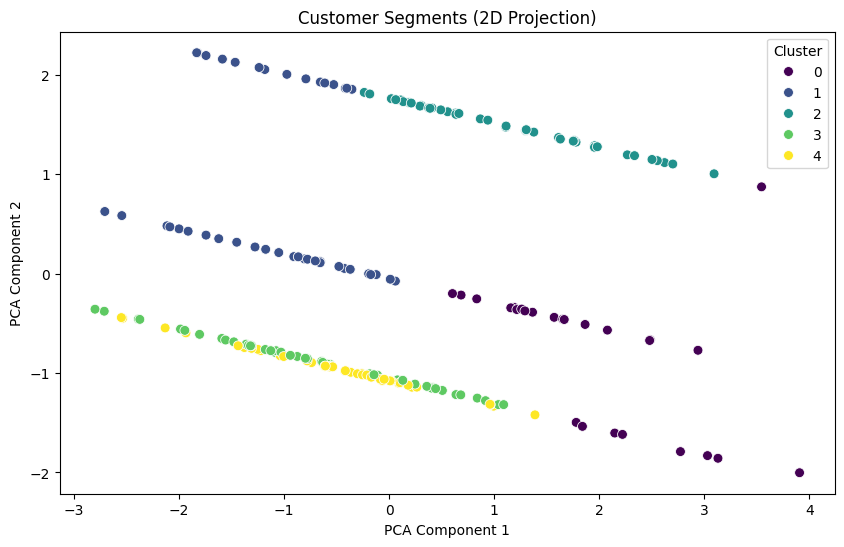

In [11]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_data['Cluster'], palette='viridis', s=50)
plt.title('Customer Segments (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
